In [8]:
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("..")
from config import *
from sklearn.linear_model import LinearRegression
import math
from scipy.optimize import curve_fit

In [9]:
loaded_node_temp= pd.read_pickle(Dict_temp_2_without_defects)
loaded_nodes_loc=pd.read_pickle(Nodes_loc_2_without_defects)

df= pd.read_csv(result_df)
#df.head()

In [10]:
#loaded_node_temp.keys()

In [11]:
temperature =[]
# Using a loop
for key in loaded_node_temp:
    if len(loaded_node_temp[key]) >= 3:  # Make sure the list has at least 2 elements
        temperature .append(loaded_node_temp[key][2])

print(temperature )


[25.00130708710042, 25.00352686220171, 25.006472239282864, 25.01005203083738, 25.01422081709658, 25.018955596658333, 25.024244577520705, 25.030081660659498, 25.0364636717407, 25.043388951382415, 25.049535997101447, 25.054359529113757, 25.058332964683892, 25.061683327295743, 25.064522249537276, 25.066905714855913, 25.068862218712976, 25.070406423682527, 25.071545933415553, 25.072284712640077, 25.072842684415644, 25.074244443879476, 25.07613071669293, 25.078330701330483, 25.080760997040244, 25.083380004159437, 25.086166633665794, 25.08911006567446, 25.092204700896115, 25.09544762397194, 25.098837310492122, 25.10237296100333, 25.106054155392012, 25.109880672580477, 25.11385239611954, 25.117969264631586, 25.122231245751625, 25.126638322408148, 25.131190485594672, 25.135887730558856, 25.140730054792964, 25.145281761273402, 25.148802924267958, 25.15161883814804, 25.153884622568597, 25.155676209020847, 25.15703154443044, 25.157969893704138, 25.15850115116955, 25.15863044094619, 25.15836043237

In [12]:
amplitude_data = df["df_0_028.csv_Amplitude"].values
phase_data = df["df_0_028.csv_Phase"].values

In [13]:
amp= amplitude_data[2]
ph= phase_data[2]
time = list(loaded_node_temp.keys())

Fitted 'a' coefficient: 24.38163554996864
Fitted 'b' coefficient: 0.6815210099544297


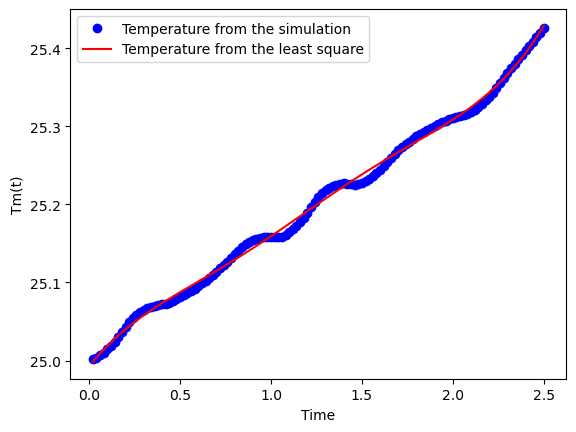

In [14]:
# Define the function Tm(t) = a + bt + ∑∆Tn cos(nωt + ϕn) for n = 1, 3, 5, 7
def tm_function(t, a, b, *params):
    result = a + b * t
    num_terms = len(params) // 2  # Since each term has both ∆Tn and ϕn
    for n in range(1, num_terms + 1):
        delta_Tn = params[2*n - 2]
        phi_n = params[2*n - 1]
        result += delta_Tn * np.cos(n * omega * t + phi_n)
        
    return result


time= np.array(time)

# Initial guess for parameters
initial_guess = [1.0, 1.0] + [0.0, 0.0, 0.0, 0.0]  # [a, b, ∆T1, ϕ1, ∆T3, ϕ3, ∆T5, ϕ5, ∆T7, ϕ7]

# Angular frequency
omega = 2 * np.pi*0.182

# Perform the curve fitting
popt, _ = curve_fit(tm_function, time, temperature, p0=initial_guess)


a_fit = popt[0]
b_fit = popt[1]

print("Fitted 'a' coefficient:", a_fit)
print("Fitted 'b' coefficient:", b_fit)

# Generate fitted curve using the fitted coefficients
fitted_curve = tm_function(time, *popt)


plt.plot(time, temperature, 'bo', label='Temperature from the simulation')
plt.plot(time, fitted_curve, 'r-', label='Temperature from the least square')
plt.xlabel('Time')
plt.ylabel('Tm(t)')
plt.legend()
plt.show()


In [15]:
popt

array([24.38163555,  0.68152101,  0.6724387 ,  0.21666202, -0.10888772,
       -1.13622666])

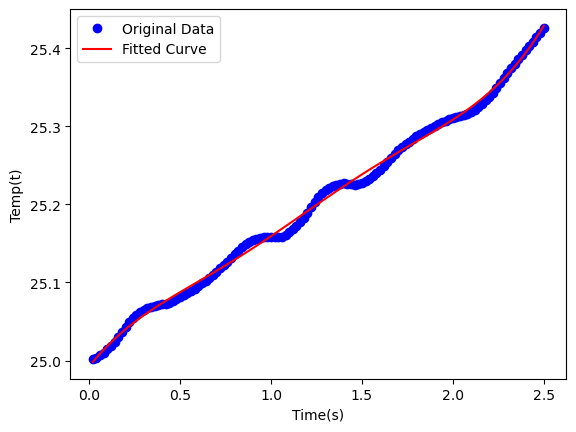

In [16]:
new_node_temperature =[]
# Using a loop
for key in loaded_node_temp:
    if len(loaded_node_temp[key]) >= 100:  
        new_node_temperature.append(loaded_node_temp[key][4])

plt.plot(time, new_node_temperature, 'bo', label='Original Data')
plt.plot(time,  fitted_curve, 'r-', label='Fitted Curve')
plt.xlabel('Time(s)')
plt.ylabel('Temp(t)')
plt.legend()
plt.show()

In [17]:
Error= abs((temperature- fitted_curve)/temperature)

In [18]:
np.mean(Error)*100

0.021118689225091705

In [19]:
#0∘=∑𝑡sin(2𝜋𝜔𝑡+3𝜋2)∗𝑇(𝑡),
(1)
#90∘=∑𝑡cos(2𝜋𝜔𝑡+3𝜋2)∗𝑇(𝑡).
# https://www.mdpi.com/2076-3417/13/7/4094
#https://www.sciencedirect.com/science/article/abs/pii/S0026271410003550

1